# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** What is random walk?

<br></font>
</div>

# What is random walk?

<div class="alert alert-block alert-info">
<font color=black><br>

- How do you know your time series problem is predictable? 
- There is a tool called a **random walk** that can help you understand the predictability of your time series forecast problem. 
- A **common mistake** that beginners make is to think that a random walk is a list of random numbers, and this is not the case at all.
- The random walk hypothesis is a theory that stock market prices are a random walk and cannot be predicted.

<br></font>
</div>

# Import modules

In [4]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20

# Random walk vs. random numbers

<div class="alert alert-block alert-info">
<font color=black><br>

- A random walk is different from a list of random numbers because the  next value in the sequence is a modification of the previous value in  the sequence. 
- The process used to generate the series forces dependence from one-time step to the next. 
- This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides.
- The graph below looks very different from a sequence of random numbers. 
- It **LOOKS LIKE** a realistic time series for the price of a security on the stock market.

<br></font>
</div>

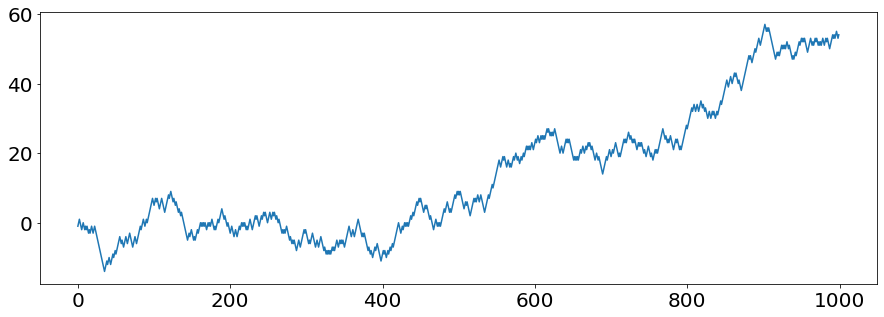

In [5]:
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    # Here we see the PURE random component is ADDED to the previous step
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

# Random Walk and Autocorrelation

<div class="alert alert-block alert-info">
<font color=black><br>

- Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.
- We can see we start off with a strong positive correlation and then this becomes negatives.
- No apparent trend is visible.

<br></font>
</div>

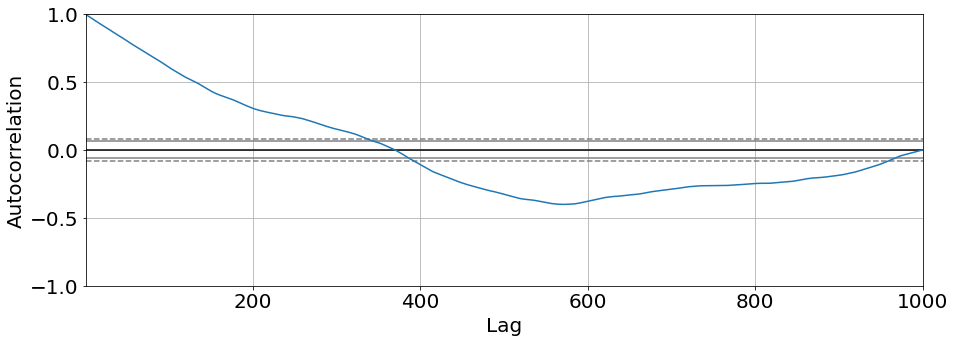

In [6]:
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

# Random Walk and Stationarity

<div class="alert alert-block alert-info">
<font color=black><br>

- Therefore we can expect a random walk to be non-stationary. 
- In fact, all random walk processes are non-stationary, but **not all** non-stationary time series are random walks.
- The null hypothesis of the test is that the time series is non-stationary.
- Running the example, we can see that the test statistic value was 0.341605.
- This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. 
- Therefore, we can say that the time series does appear to be non-stationary.

<br></font>
</div>

In [7]:
# generate random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

# statistical test
result = adfuller(random_walk) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


# Can we make it stationary?

<div class="alert alert-block alert-info">
<font color=black><br>

- We can make the random walk stationary by taking the first difference. 
- That is replacing each observation as the difference between it and the previous value. 
- Given the way that this random walk was constructed, we would expect this to result in a time series of -1 and 1 values. 
- This difference graph also makes it clear that really we have no information to work with here other than a series of random moves. **There is no structure to learn**.
- Now that the time series is stationary, we can recalculate the correlogram of the differenced series.

<br></font>
</div>

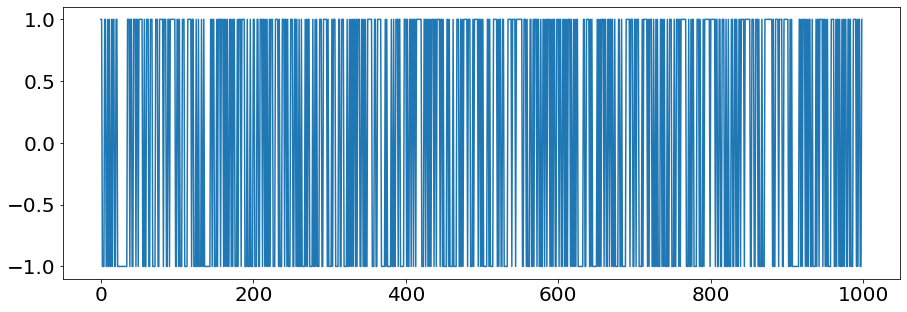

In [8]:
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)

 # line plot
pyplot.plot(diff)
pyplot.show()

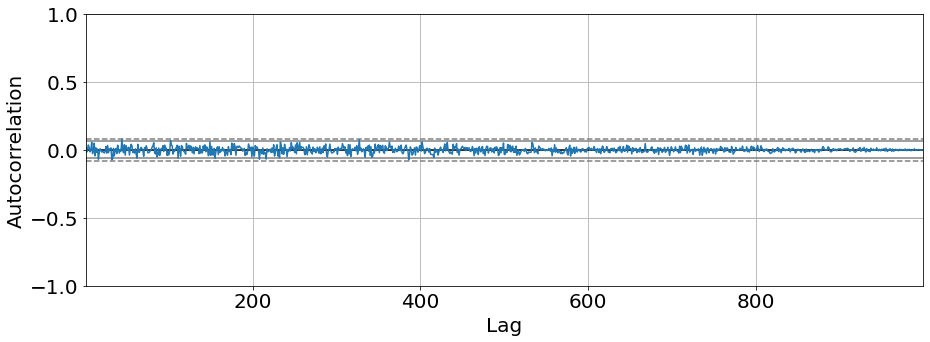

In [9]:
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)

 # line plot
autocorrelation_plot(diff)
pyplot.show()

<div class="alert alert-block alert-warning">
<font color=black><br>

- Running the example, we can see no significant relationship between the lagged observations, as we would expect from the way the random walk was generated. 
- All correlations are small, close to zero and below the 95% and 99% confidence levels (beyond a few statistical flukes).

<br></font>
</div>

# Predicting a Random Walk

<div class="alert alert-block alert-info">
<font color=black><br>

- A random walk is unpredictable; it cannot reasonably be predicted. 
- **However**, given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. 
- Simply because we know that the next time step will be a function of the prior time step. This is often called the **NAIVE forecast**, or a **PERSISTENCE mode**.
- Running the example estimates the RMSE of the model as 1. This too is expected, given that we know that the variation from one time step to the next is always going to be 1, either in the positive or negative direction.

<br></font>
</div>

In [12]:
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


<div class="alert alert-block alert-info">
<font color=black><br>

- **Another error** that beginners to the random walk make is to assume that if the range of error (variance) is known, then we can make predictions using a random walk generation type process. 
- That is, if we know the error is either -1 or 1, then why not make predictions by adding a  randomly selected -1 or 1 to the previous value. 
- We can demonstratethis random prediction method in Python below.
- Running the example, we can see that indeed the algorithm results in a worse performance than the persistence method, with a RMSE of 1.328.
 
<br></font>
</div>

In [11]:
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.328


# Conclusions

<div class="alert alert-danger">
<font color=black>

- Random walk is both an algorithm and a concept.
- We can test if the time series is or a random walk or not.
- Even if it is, we can make some naive prediction.

</font>
</div>

# References

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/
- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search
    
</font>
</div>